In [1]:
from sim import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Teste com 10 nós de fog e 10 requisições por sensor

In [11]:
tests = [100, 1000, 10000, 100000]
timeResults = list()
dropsResults = list()
simulations = [Simulation(sensors=i, fogs=10, requests=10) for i in tests]
for s in simulations:
    s.sim()  
    timeResults.append(s.timeResult())
    dropsResults.append(s.dropResult())

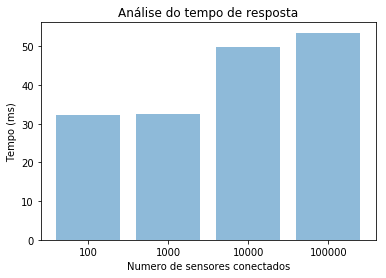

In [12]:
objects = tests
y_pos = np.arange(len(tests))
plt.bar(y_pos, timeResults, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Tempo (ms)')
plt.xlabel('Numero de sensores conectados')
plt.title('Análise do tempo de resposta')
plt.show()

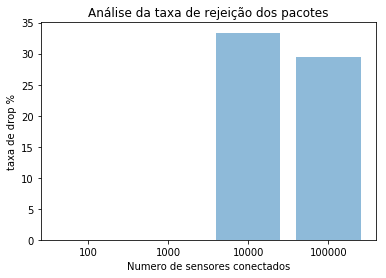

In [13]:
objects = tests
y_pos = np.arange(len(tests))
plt.bar(y_pos, dropsResults, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('taxa de drop %')
plt.xlabel('Numero de sensores conectados')
plt.title('Análise da taxa de rejeição dos pacotes')
plt.show()

## Teste com 100 nós de fog e 10 requisições por sensor

In [5]:
tests = [100, 1000, 10000, 100000]
timeResults = list()
dropsResults = list()
simulations = [Simulation(sensors=i, fogs=100, requests=10) for i in tests]
for s in simulations:
    s.sim()  
    timeResults.append(s.timeResult())
    dropsResults.append(s.dropResult())

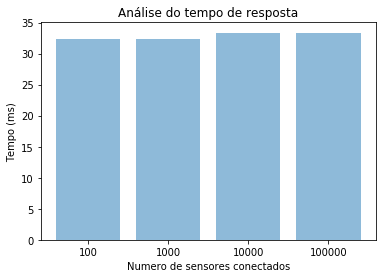

In [6]:
objects = tests
y_pos = np.arange(len(tests))
plt.bar(y_pos, timeResults, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Tempo (ms)')
plt.xlabel('Numero de sensores conectados')
plt.title('Análise do tempo de resposta')
plt.show()

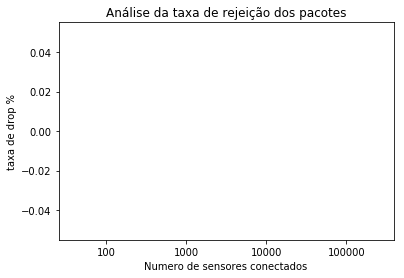

In [7]:
objects = tests
y_pos = np.arange(len(tests))
plt.bar(y_pos, dropsResults, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('taxa de drop %')
plt.xlabel('Numero de sensores conectados')
plt.title('Análise da taxa de rejeição dos pacotes')
plt.show()

## Teste com 10 nós de fog e 100 requisições por sensor

In [8]:
tests = [100, 1000, 10000, 100000]
timeResults = list()
dropsResults = list()
simulations = [Simulation(sensors=i, fogs=10, requests=100) for i in tests]
for s in simulations:
    s.sim()  
    timeResults.append(s.timeResult())
    dropsResults.append(s.dropResult())

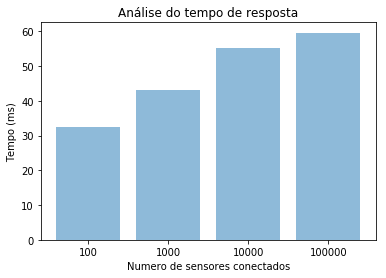

In [9]:
objects = tests
y_pos = np.arange(len(tests))
plt.bar(y_pos, timeResults, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Tempo (ms)')
plt.xlabel('Numero de sensores conectados')
plt.title('Análise do tempo de resposta')
plt.show()

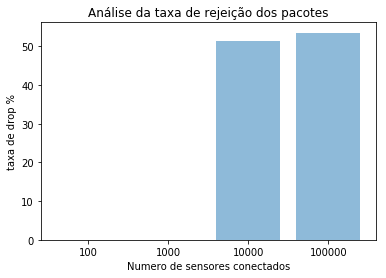

In [10]:
objects = tests
y_pos = np.arange(len(tests))
plt.bar(y_pos, dropsResults, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('taxa de drop %')
plt.xlabel('Numero de sensores conectados')
plt.title('Análise da taxa de rejeição dos pacotes')
plt.show()